In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion = keras.datasets.fashion_mnist

In [4]:
fashion

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [13]:
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
#Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [11]:
#Compile the model
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
test_loss,test_accuracy = model.evaluate(test_images,test_labels)
print('Test accuracy : ',test_accuracy)
print("test loss : ",test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 131.6919 - accuracy: 0.1044
Test accuracy :  0.10440000146627426
test loss :  131.69189453125


In [19]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


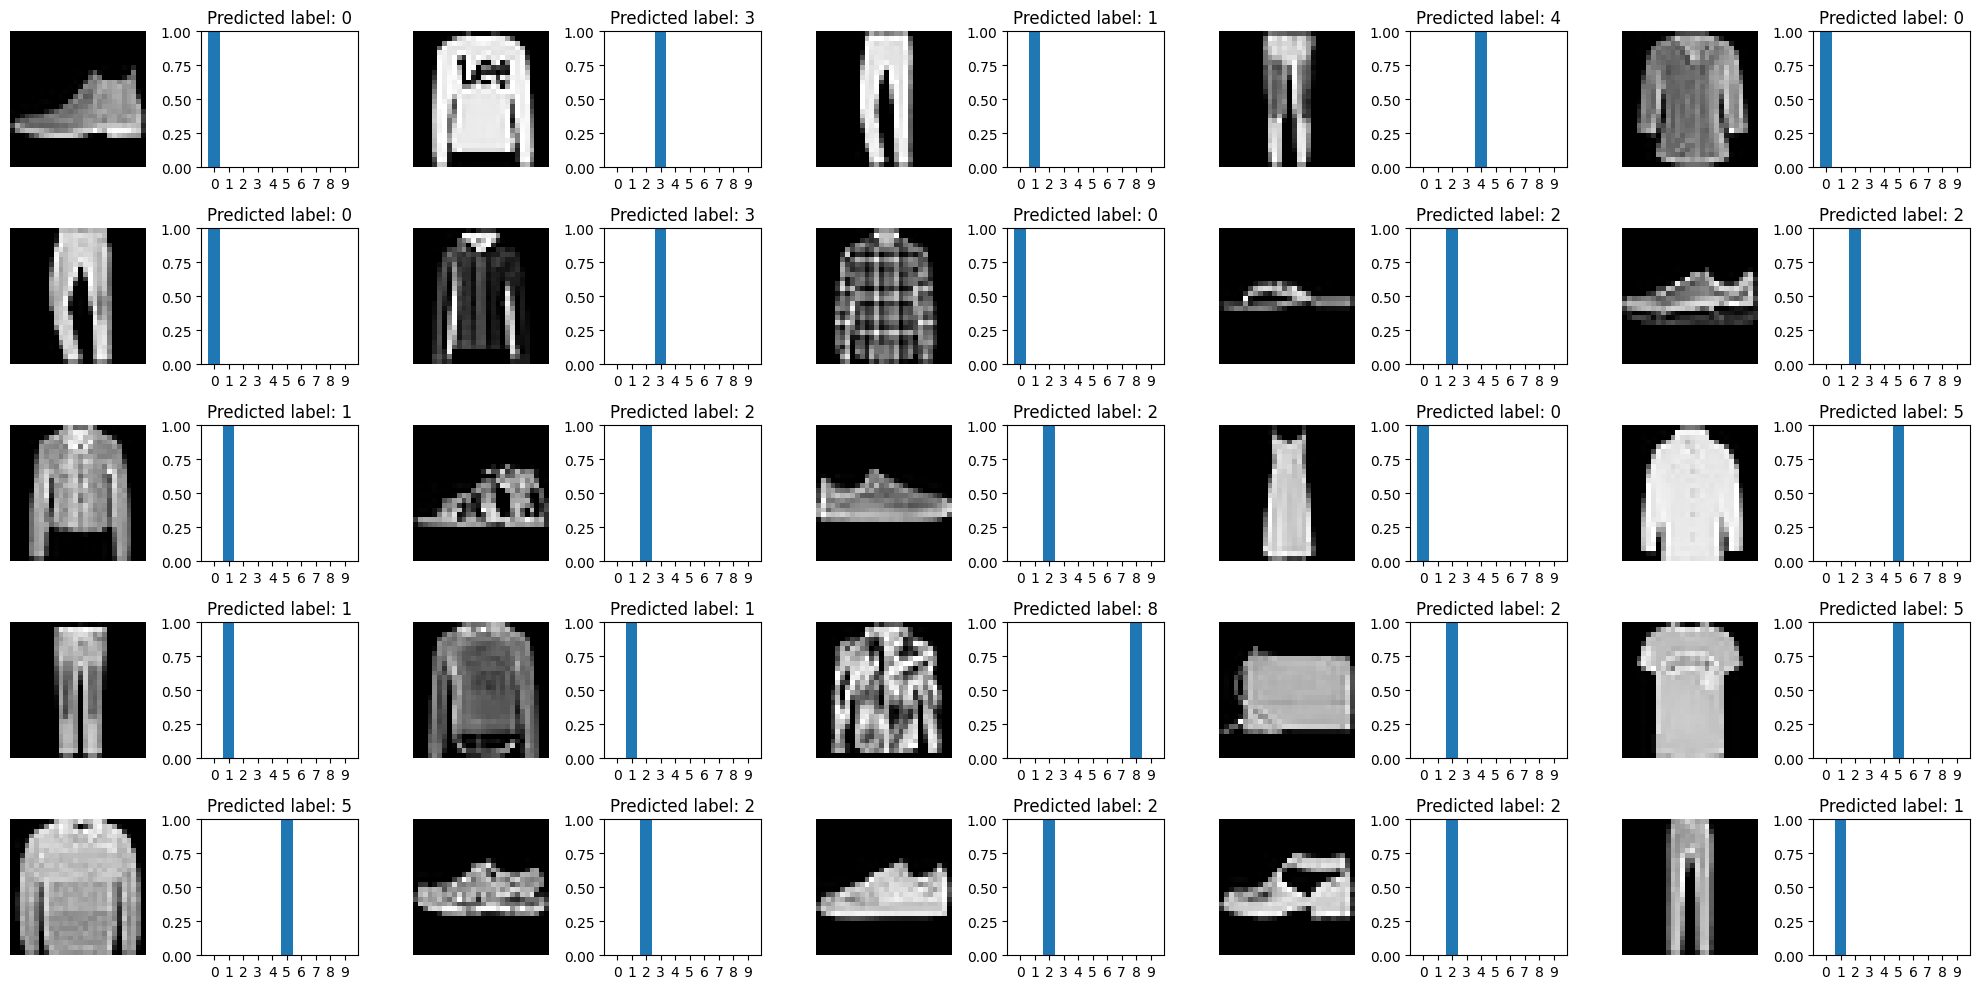

In [23]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols 
plt.figure(figsize=(2 *2 * num_cols, 2 * num_rows)) 
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plt.imshow(test_images[i], cmap='gray') 
  plt.axis('off')
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plt.bar(range(10), predictions[i]) 
  plt.xticks(range(10))
  plt.ylim([0, 1])
  plt.tight_layout()
  plt.title(f"Predicted label: {predicted_labels[i]}")

plt.show()
